In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
obama_data = pd.read_csv('./barack_obama_deepfake_voice_export.csv')
trump_data = pd.read_csv('./donald_trump_deepfake_voice_export.csv')
sanders_data = pd.read_csv('./bernie_sanders_deepfake_voice_export.csv')
guinness_data = pd.read_csv('./alec_guinness_deepfake_voice_export.csv')
common_voice = pd.read_csv('./common_voice_export.csv')

obama_bona_fide = obama_data.iloc[:500,:]
obama_spoof = obama_data.iloc[500:,:]
trump_bona_fide = trump_data.iloc[:500,:]
trump_spoof = trump_data.iloc[500:,:]
sanders_bona_fide = sanders_data.iloc[:500,:]
sanders_spoof = sanders_data.iloc[500:,:]
guinness_bona_fide = guinness_data.iloc[:500,:]
guinness_spoof = guinness_data.iloc[500:,:]

common_voice.head()

,chroma,centroid,bandwidth,zcr,energy,contrast,rolloff,pitch,mfcc_1,mfcc_2,...,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label
0,0.420296,2395.313798,2010.015320,0.114709,1764.573853,22.737518,4455.384498,473.543553,-369.460785,108.754082,...,23.355818,-0.769517,-11.537495,-3.588425,-9.612415,0.503762,-3.516332,-3.745388,-1.522713,male
1,0.344950,1262.095155,1264.673656,0.036212,7007.860840,20.076713,2189.094661,623.406615,-367.115662,130.169296,...,13.499375,-1.867014,13.503960,-3.363772,-2.069705,4.406932,-18.351679,-13.232059,-1.894985,male
2,0.565208,4167.961735,3805.325451,0.104360,368.941467,20.623177,8150.992299,851.642499,-339.008667,102.369614,...,-8.628662,29.446667,-17.978962,14.378601,-0.558806,-1.382019,-2.590462,5.881678,10.511349,male
3,0.391781,2742.610661,1951.070557,0.102079,1281.419312,21.361173,4543.056110,490.992872,-383.522125,123.523636,...,7.595569,-17.776217,14.339432,0.914608,-15.038569,4.608672,-3.263601,-9.664649,0.247904,male
4,0.339872,1904.902078,1597.256686,0.084758,2003.275024,23.243073,3375.374251,446.016749,-328.993408,104.970963,...,8.872935,7.306342,6.228225,-23.246098,-3.641305,-12.042892,-13.315507,8.476216,-9.004224,male


In [19]:
data_point_split = 100

obama_bona_fide_sample = obama_bona_fide.drop(columns=['label']).sample(n=(data_point_split))
obama_spoof_sample = obama_spoof.drop(columns=['label']).sample(n=data_point_split)
trump_bona_fide_sample = trump_bona_fide.drop(columns=['label']).sample(n=data_point_split)
trump_spoof_sample = trump_spoof.drop(columns=['label']).sample(n=data_point_split)
sanders_bona_fide_sample = sanders_bona_fide.drop(columns=['label']).sample(n=data_point_split)
sanders_spoof_sample = sanders_spoof.drop(columns=['label']).sample(n=data_point_split)
guinness_bona_fide_sample = guinness_bona_fide.drop(columns=['label']).sample(n=data_point_split)
guinness_spoof_sample = guinness_spoof.drop(columns=['label']).sample(n=data_point_split)
common_voice_sample = common_voice.drop(columns=['label']).sample(n=data_point_split)

obama_bona_fide_sample = obama_bona_fide_sample.assign(label=['bona-fide' for row in obama_bona_fide_sample.iterrows()], person=['obama' for row in obama_bona_fide_sample.iterrows()])
obama_spoof_sample = obama_spoof_sample.assign(label=['spoof' for row in obama_spoof_sample.iterrows()], person=['obama' for row in obama_spoof_sample.iterrows()])
trump_bona_fide_sample = trump_bona_fide_sample.assign(label=['bona-fide' for row in trump_bona_fide_sample.iterrows()], person=['trump' for row in trump_bona_fide_sample.iterrows()])
trump_spoof_sample = trump_spoof_sample.assign(label=['spoof' for row in trump_spoof_sample.iterrows()], person=['trump' for row in trump_spoof_sample.iterrows()])
sanders_bona_fide_sample = sanders_bona_fide_sample.assign(label=['bona-fide' for row in sanders_bona_fide_sample.iterrows()], person=['sanders' for row in sanders_bona_fide_sample.iterrows()])
sanders_spoof_sample = sanders_spoof_sample.assign(label=['spoof' for row in sanders_spoof_sample.iterrows()], person=['sanders' for row in sanders_spoof_sample.iterrows()])
guinness_bona_fide_sample = guinness_bona_fide_sample.assign(label=['bona-fide' for row in guinness_bona_fide_sample.iterrows()], person=['guinness' for row in guinness_bona_fide_sample.iterrows()])
guinness_spoof_sample = guinness_spoof_sample.assign(label=['spoof' for row in guinness_spoof_sample.iterrows()], person=['guinness' for row in guinness_spoof_sample.iterrows()])
# common_voice_sample = common_voice_sample.assign(label=['bona-fide' for row in guinness_spoof_sample.iterrows()], person=['common' for row in common_voice_sample.iterrows()])

identification_data = pd.concat(
    [
        obama_bona_fide_sample,
        obama_spoof_sample,
        trump_bona_fide_sample,
        trump_spoof_sample,
        sanders_bona_fide_sample,
        sanders_spoof_sample,
        guinness_bona_fide_sample,
        guinness_spoof_sample,
        # common_voice_sample
    ],
    ignore_index=True, sort=False
)
identification_data.reset_index()

identification_data.head()


,chroma,centroid,bandwidth,zcr,energy,contrast,rolloff,pitch,mfcc_1,mfcc_2,...,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,label,person
0,0.362851,180.055358,64.356165,0.021164,6.063694,24.661146,225.025615,229.987795,-698.388855,67.179512,...,33.992553,22.392300,11.057816,0.675047,-8.236821,-15.355730,-20.559426,-23.903567,bona-fide,obama
1,0.313105,178.084048,49.912486,0.021093,19.451236,25.704169,222.240691,218.143280,-692.282383,69.224750,...,34.060794,21.825899,9.920355,-0.917625,-10.129126,-17.368135,-22.506087,-25.610562,bona-fide,obama
2,0.379697,188.896654,78.778945,0.022800,23.494894,26.830038,233.398438,217.654915,-596.659722,49.285814,...,24.723367,16.082810,7.599303,-0.221145,-6.989542,-12.456158,-16.513236,-19.180403,bona-fide,obama
3,0.291096,178.905438,58.780711,0.020392,66.646137,24.695683,225.040584,208.254488,-648.617334,67.543454,...,31.900452,19.704095,7.994641,-2.468067,-11.128890,-17.672829,-22.027060,-24.332865,bona-fide,obama
4,0.357931,181.979974,81.586803,0.021300,9.456591,24.830070,232.812500,212.898657,-641.792849,56.752833,...,28.423649,18.605395,9.069904,0.400443,-6.971761,-12.791809,-16.980069,-19.609126,bona-fide,obama


In [14]:
authentication_data_missing_values = identification_data.isnull().sum()

print("Columns with missing values:")
authentication_data_missing_values

Columns with missing values:


chroma       0
centroid     0
bandwidth    0
zcr          0
energy       0
contrast     0
rolloff      0
pitch        0
mfcc_1       0
mfcc_2       0
mfcc_3       0
mfcc_4       0
mfcc_5       0
mfcc_6       0
mfcc_7       0
mfcc_8       0
mfcc_9       0
mfcc_10      0
mfcc_11      0
mfcc_12      0
mfcc_13      0
label        0
person       0
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder

# Prepare the data

# Encode categorical labels to numeric
label_encoder = LabelEncoder()
identification_data['label'] = label_encoder.fit_transform(identification_data['label'])
identification_data['person'] = label_encoder.fit_transform(identification_data['person'])

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into features and labels
X = identification_data.drop(columns=['label', 'person'])
y = identification_data['person']  # Can swap for label if wanting to check deepfake

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Below is for a combined classification experiment

In [ ]:
# Create a combined target column
identification_data['combined_label'] = identification_data['label'] + '_' + identification_data['person']

# Encode the combined labels to numeric
label_encoder = LabelEncoder()
identification_data['combined_label'] = label_encoder.fit_transform(identification_data['combined_label'])

# Split the data into features and combined labels
X = identification_data.drop(columns=['label', 'person', 'combined_label'])
y = identification_data['combined_label']

In [17]:
from sklearn.svm import SVC
from sklearn import metrics

# Create and train the SVM model
svm_classifier = SVC(kernel='rbf', probability=True)
svm_classifier.fit(X_train, y_train)
# Make predictions
y_pred = svm_classifier.predict(X_test)
print("\nAccuracy Score:")
print(metrics.accuracy_score(y_test, y_pred))



Accuracy Score:
0.6388888888888888


              precision    recall  f1-score   support

           0       0.93      0.68      0.79        19
           1       0.39      0.59      0.47        34
           2       1.00      1.00      1.00        38
           3       0.54      0.69      0.61        45
           4       0.65      0.30      0.41        44

    accuracy                           0.64       180
   macro avg       0.70      0.65      0.65       180
weighted avg       0.68      0.64      0.63       180



<Axes: >

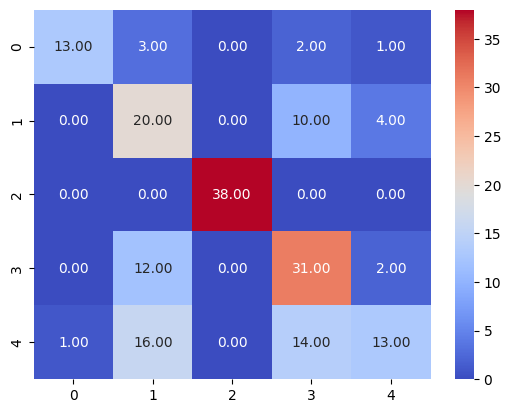

In [18]:
import seaborn as sns

confusion = metrics.confusion_matrix(y_test, y_pred)
classification = metrics.classification_report(y_test, y_pred)
print(classification)
sns.heatmap(confusion , annot = True, cmap="coolwarm", fmt=".2f")